In [54]:
import math as math

import numpy as np

In [55]:
data = np.genfromtxt('data_class10.csv', delimiter=',')

print(data.shape)
n = data.shape[0]

(1200, 2)


In [56]:
k = 6

In [57]:
# Option 1
# Takes 6 random index from the dataset
# center_idx = np.random.choice(n, k, replace=False)
# 
# centers = list()

# for i in center_idx:
#     centers.append(data[i].tolist())

In [58]:
# Option 2
centers = data[np.random.choice(n, k, replace=False)]

In [59]:
print(centers)

[[ 0.26818335  9.87246082]
 [11.83988933  4.78024561]
 [ 1.36787443  6.8501531 ]
 [ 0.90699201  0.5453247 ]
 [14.23524456  5.86052093]
 [ 1.26128412  8.4223171 ]]


In [60]:
def calc_distance(a, b):
    distance = 0
    for x1, x2 in zip(a, b):
        distance += (x1 - x2) ** 2
    return math.sqrt(distance)

In [61]:
for s in data:
    idx = -1
    min = 999
    for i, c in enumerate(centers):
        distance = calc_distance(s, c)
        if min > distance:
            min = distance
            idx = i

In [62]:
data[0]

array([0.20987452, 2.00290685])

In [63]:
centers[0]

array([0.26818335, 9.87246082])

In [64]:
data[0] - centers[0]

array([-0.05830883, -7.86955397])

In [65]:
math.sqrt(((data[0] - centers[0]) ** 2).sum())

7.869769985658732

In [66]:
math.sqrt(((data[0] - centers[1]) ** 2).sum())

11.957042073331085

In [67]:
(data-centers[0]).shape

(1200, 2)

In [68]:
(data-centers[0]) ** 2

array([[3.39991955e-03, 6.19298797e+01],
       [2.74591835e+00, 6.54505211e+01],
       [3.80908170e-01, 9.46935406e+01],
       ...,
       [1.83730755e+02, 2.61490106e+01],
       [1.67286464e+02, 3.19119504e+01],
       [1.50932480e+02, 2.59550676e+01]])

In [69]:
((data-centers[0]) ** 2).sum(axis=1) ** 0.5

array([ 7.86976999,  8.25811355,  9.75061274, ..., 14.48722766,
       14.11376684, 13.29990779])

In [70]:
distance = np.zeros((n, k))

for i in range(k):
    # Center to distance
    distance[:,i] = ((data-centers[i]) ** 2).sum(axis=1) ** 0.5

In [71]:
distance

array([[ 7.86976999, 11.95704207,  4.98364927,  1.61570991, 14.54620883,
         6.50494352],
       [ 8.25811355, 10.35796283,  5.09840225,  1.60219059, 12.96793742,
         6.67312135],
       [ 9.75061274, 11.89624223,  6.72608242,  0.40450327, 14.52335136,
         8.28944526],
       ...,
       [14.48722766,  1.98314124, 12.62939374, 13.58583345,  1.17630494,
        13.08493645],
       [14.11376684,  1.47164156, 12.12225215, 12.83347688,  1.93585888,
        12.65757791],
       [13.29990779,  0.7137561 , 11.37610769, 12.39188064,  1.99999182,
        11.86589564]])

In [72]:
np.argmin(distance, axis = 1).shape

(1200,)

In [73]:
closest = np.argmin(distance, axis = 1)

In [74]:
closest

array([3, 3, 3, ..., 4, 1, 1], dtype=int64)

In [75]:
closest==0

array([False, False, False, ..., False, False, False])

In [76]:
for i in range(k):
    centers[i] = data[closest==i].mean(axis=0)

In [77]:
centers

array([[-0.09771191,  9.21974408],
       [ 9.64184696,  2.61166432],
       [ 3.66951368,  5.63939208],
       [ 2.1065332 ,  0.99200967],
       [13.20567025, 10.59359296],
       [ 1.38880275,  8.31330931]])

In [78]:
old_closest = closest.copy()

In [79]:
# if all(old_closest == closest):
#     break

In [80]:
from matplotlib import pyplot as plt

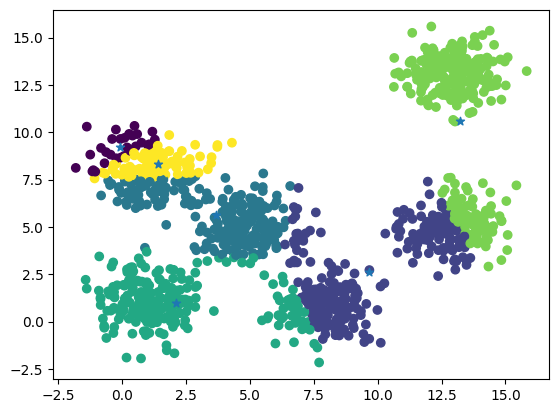

In [81]:
plt.scatter(data[:,0],data[:,1],c=closest)
plt.scatter(centers[:,0],centers[:,1],marker='*')
plt.show()